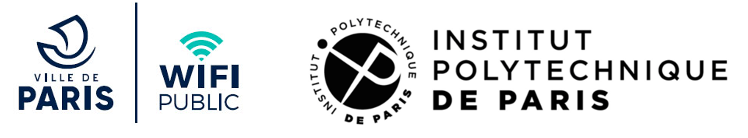

**Data Camp 2022** : <br>
*Aurélien Renault | Ayoub Tabaai | César Leblanc | Ikhlass Yaya-Oyé | Oumaima Bouther | Victor Clermont*

# Introduction


## Context 

The town hall of Paris has set up a wifi system to allow parisians and tourists free and high-speed wifi access to the internet throughout the city. This internet access is distributed through hotspot terminals distributed throughout the city.

The principle is as follows: anyone wishing to have internet access can connect to the internet network distributed by the city of Paris, by registering and providing their identity. The user then has access to 2 hours of connection. (Note that there is no connection limit. Once his 2H package has been used, one can reconnect to have 2 new hours).

The number of hotspots, their density and their positioning is different for each of the 20 arrondissements in the city of Paris. Moreover the activity is different according to the periods of the year and the days of the week. Thus, the number of users per day is a variable data just like the total internet consumption. (Quantify by the in and out flow of data of all users).

These hotspots are therefore subject to uneven daily use depending on the boroughs, and predicting the use of wifi in the different areas of the city will allow better management of this device. (To perform maintenance, to invest in areas where use is important). And thus will enable better service for customers.

This is therefore what this challenge proposes, we want to predict internet consumption, ie the number of gigabytes entering and leaving according to the districts, taking into account past data. We'll elaborate on the framing of this prediction, but first let's look at what the data we have looks like.

## Download the Data


In [1]:
%pip install --upgrade gdown --quiet
!gdown https://drive.google.com/uc?id=1_BCnwRJpYfPT_U0ziz7BGYYJdIjROzLM

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Downloading...
From: https://drive.google.com/uc?id=1_BCnwRJpYfPT_U0ziz7BGYYJdIjROzLM
To: /content/hotspots.csv
100% 776M/776M [00:05<00:00, 133MB/s]


In [2]:
#!pip install plotly
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

## Description of the data


The data was retrieved from the website of the city of Paris ( https://opendata.paris.fr/explore/dataset/paris-wi-fi-utilisation-des-hotspots-paris-wi-fi) We will browse this dataset to see what it contains !

In [3]:
# After downloadind our .csv file, let's put our data in a pandas dataframe
df = pd.read_csv('hotspots.csv', low_memory=False, sep = ';')

In [4]:
# Dimension of the file
df.shape

(2033801, 25)

Our data is composed of 2033801 rows and 25 columns. We are know going to see what are the 25 differents features of this dataset and describe them.

In [5]:
#Let's have a quick look of what is inside
df.head(3)

,code_site,datetime,endtime_or_dash,duration,temps_de_sessions_en_minutes,incomingzonelabel,incomingnetworklabel,device_portal_format,device_constructor_name,device_operating_system_name_version,...,packetsin,packetsout,userlanguage,geo_shape,geo_point_2d,nom_site,arc_adresse,cp,nombre_de_borne_wifi,etat2
0,PW0191,2019-09-01T13:30:00+00:00,2019-09-01T13:34:00+00:00,209,3.483333,JARD GARCIA LORCA-SQ HDV,75004,Mobile,Apple,iOS 12.3.1,...,5095,6004,Français,"{""coordinates"": [2.353240934, 48.8547105055], ...","48.8547105055,2.35324093401",JARDIN FREDERICO GARCIA LORCA - SQUARE HDV,QUAI DE L'HOTEL DE VILLE,75004.0,1.0,Opérationnel
1,PW0122-1,2019-09-01T13:27:00+00:00,2019-09-01T13:43:00+00:00,963,16.050000,HDV RDC,75004,Mobile,HUAWEI,Android 5.1,...,38770,38287,Français,"{""coordinates"": [2.352388267, 48.856389683], ""...","48.856389683,2.35238826701",HOTEL DE VILLE RDC,4 PLACE DE L'HOTEL DE VILLE,75004.0,4.0,Opérationnel
2,PW0110,2019-09-01T13:30:00+00:00,2019-09-01T13:53:00+00:00,1402,23.366667,JARD NELSON MANDELA,75001,Mobile,autre,Android 7.0,...,18043,20012,Français,"{""coordinates"": [2.346303724, 48.8614694222], ...","48.8614694222,2.34630372401",JARDIN NELSON MANDELA,32 RUE BERGER,75001.0,2.0,Opérationnel


In [6]:
df.dtypes

code_site                                object
datetime                                 object
endtime_or_dash                          object
duration                                  int64
temps_de_sessions_en_minutes            float64
incomingzonelabel                        object
incomingnetworklabel                     object
device_portal_format                     object
device_constructor_name                  object
device_operating_system_name_version     object
device_browser_name_version              object
bytesin                                   int64
donnee_entrante_go                      float64
bytesout                                  int64
donnee_sortante_gigaoctet               float64
packetsin                                 int64
packetsout                                int64
userlanguage                             object
geo_shape                                object
geo_point_2d                             object
nom_site                                

So we can see our 25 features, some of them are encoded as integer and float the other ones as objects/string.
We give a quick definition of some important or unknown variables : 


*   "Duration" ( Int ): The duration of the surf session on the wifi ( Unity : Second )   
*   "temps_de_sessions_en_minutes" ( Float ): A Float of duration convert in minute.

*   "incomingnetworklabel" ( Object ) : The place where the connection is, it can be a zip code or a name of place like 'Musée d'Orsay'.
*   "bytesin" & "bytesout" ( Int ) : Correspond to the number of byte ("in" or "out") the connexion has envolved. The byte quantifies the data you'll exchange with internet, with the bytes in means your activity about downloadind whereas bytes out refers to your uploadind activity. 

*   "donnee_entrante_go" & "donnee_sortante_go" (float ) : Same as byte, quantifie the consumption of the internet by indicating the number of data ( but here expressed in MegaBytes )
*   "packetsin" & "packetsout" ( Int ) : In networking, a packet is a small segment of a larger message. Data sent over computer networks, such as the Internet, is divided into packets. These packets are then recombined by the receiving computer or device. As the two others variables, this one quantifies the consumption of internet but expressed here in packet. 

*   "geo_shape" & "geo_point_2d" ( Object ) : Represent the GPS position of the localisation of the device connected (longitude and latitude)
*   CP ( Float ) : The zip code of where the connection takes place.

In [7]:
df.describe()

,duration,temps_de_sessions_en_minutes,bytesin,donnee_entrante_go,bytesout,donnee_sortante_gigaoctet,packetsin,packetsout,cp,nombre_de_borne_wifi
count,2.033801e+06,2.033801e+06,2.033801e+06,2.033801e+06,2.033801e+06,2.033801e+06,2.033801e+06,2.033801e+06,2.013882e+06,2.013882e+06
mean,2.244579e+03,3.740965e+01,6.135738e+07,5.851495e+01,9.577803e+06,9.134105e+00,5.097043e+04,5.044263e+04,7.501738e+04,3.518861e+00
std,2.379608e+03,3.966013e+01,1.154139e+08,1.100673e+02,3.592051e+07,3.425647e+01,1.200111e+05,1.224504e+05,3.144725e+02,4.163721e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.500100e+04,1.000000e+00
25%,3.860000e+02,6.433333e+00,3.455566e+06,3.295485e+00,5.422480e+05,5.171280e-01,3.366000e+03,3.750000e+03,7.500600e+04,1.000000e+00
50%,1.190000e+03,1.983333e+01,1.771998e+07,1.689909e+01,2.478415e+06,2.363601e+00,1.561100e+04,1.623500e+04,7.501300e+04,2.000000e+00
75%,3.469000e+03,5.781667e+01,6.475811e+07,6.175815e+01,8.343637e+06,7.957112e+00,5.471400e+04,5.430000e+04,7.501700e+04,4.000000e+00
max,8.573700e+04,1.428950e+03,5.217704e+09,4.975991e+03,3.774438e+09,3.599585e+03,2.238829e+07,2.214044e+07,9.210000e+04,3.200000e+01


## Modelization

Our goal is to predict the consumption of internet used, ie the data exchanged over a week. For this we have decided to use the last 2 weeks to predict consumption for the coming week. So for learning, we will therefore divide our dataset into a full sample of 3 consecutive weeks. The first 2 weeks of these samples will correspond to the input of the model. So long as the 3rd and last week of these samples will correspond to the labeling of the inputs, so the output of the model. Note that the 3 weeks of the samples follow each other! But the samples are given randomly and do not follow!

Here is a a graphical representation of the modeling :

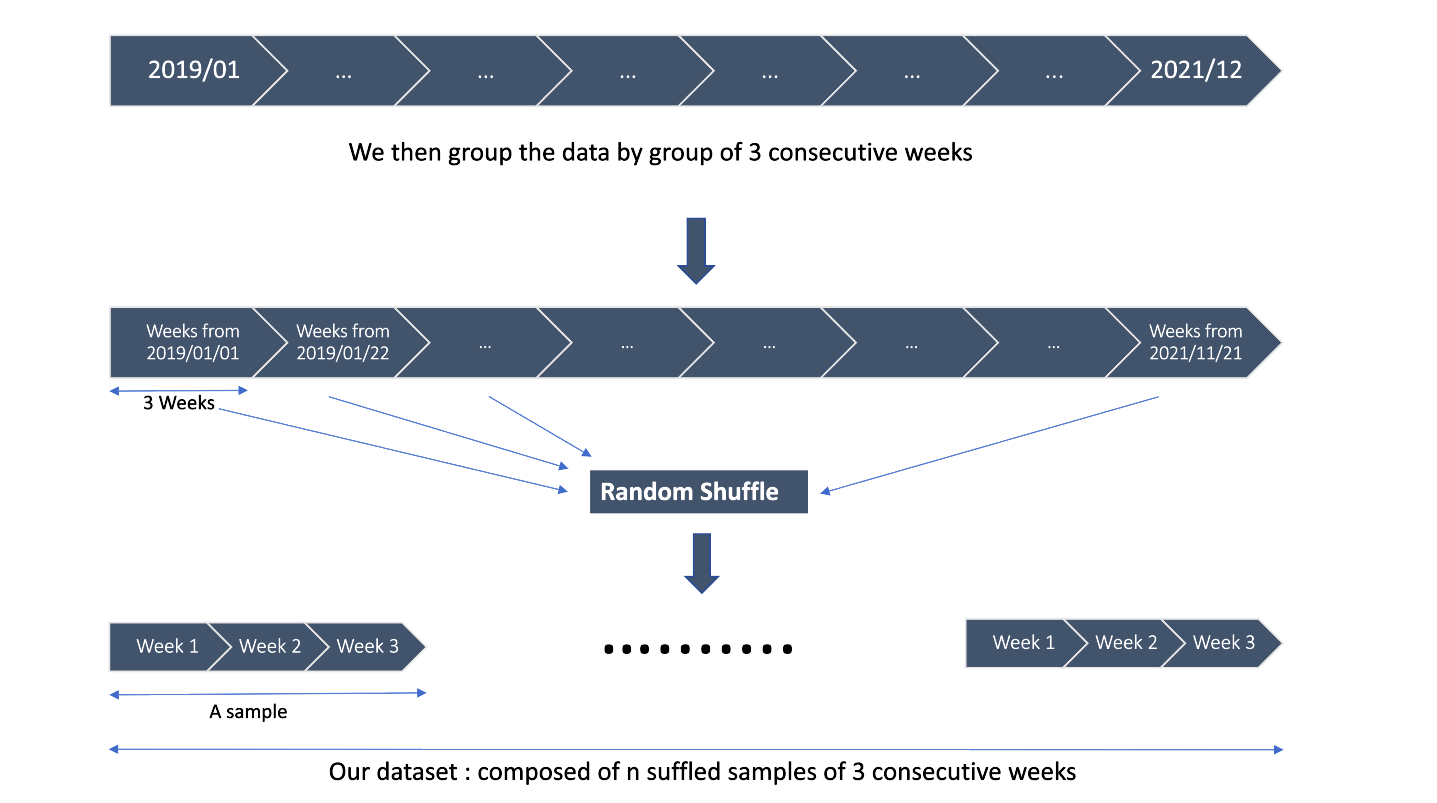

# First Preprocessing

## Processing

Now we have to deal with the processing of our dataset. To do so, let's first get the information of each column about the data type, the number of unique values and the number of missing values.

In [8]:
temp_dict = {}

len_uniq_serie = df.apply(lambda x : len(x.unique())) #Series with the number of unique values for each column
for data, data_type, nb_of_uniq, nb_of_nan in zip(
          df.dtypes.index, 
          df.dtypes.values,  
          len_uniq_serie,
          df.isna().sum().values
          ):
  temp_dict[data] = {'Type': data_type,
                     'Nb_of_unique': nb_of_uniq, 
                     'Nb_of_null': nb_of_nan}

df_col_info = pd.DataFrame().from_dict(temp_dict, orient='index')

To better visualise the results, let's build a multiindex with data type as first level and attributes (previous columns of the original dataset) as second level.

In [9]:
df_col_info.index.rename('attr', inplace=True)
df_col_info.set_index(['Type',df_col_info.index]).sort_index()

Nb_of_unique  Nb_of_null
Type    attr                                                          
int64   bytesin                                    1806681           0
        bytesout                                   1662540           0
        duration                                      7716           0
        packetsin                                   274594           0
        packetsout                                  267756           0
float64 cp                                              22       19919
        donnee_entrante_go                         1806681           0
        donnee_sortante_gigaoctet                  1662540           0
        nombre_de_borne_wifi                            18       19919
        temps_de_sessions_en_minutes                  7716           0
object  arc_adresse                                    247       19919
        code_site                                      267       15710
        datetime                                   1371231           0
        device_browser_name_version                    214       41930
        device_constructor_name                         12           0
        device_operating_system_name_version           266       76442
        device_portal_format                             5           0
        endtime_or_dash                            1216909           0
        etat2                                            4       19919
        geo_point_2d                                   505       19919
        geo_shape                                      263       19919
        incomingnetworklabel                            25       30543
        incomingzonelabel                              281           0
        nom_site                                       263       19919
        userlanguage                                    23       60025

From this dataset we can split the analysis according to the dtype of our data. <br><br>

We can see that data of type **integer** are related to the amount of data transfered during connexion (bytes and packet) and the duration in seconds which is relevant data type, and from this information we expect a large number of unique values, which is the case except for the duration. This might lead to a brief analysis / visualisations of values from this column, just to ensure nothing is wrong. <br><br>

For **float** data type we have duration converted in minutes, input and output data in gigabytes, zip code and the number of number of wifi hotspots.  
- As float type might be used for continuous value, we can change the number of wifi hotsposts into integer. 
- The zipcode can also be changed into integer however in our case as we do not have a lot of unique value let's change it to a string that we are going to use as categorical data.
<br><br>

The last data type are **string / object** ones. 
- We can see the majority of the columns have not a lot of unique values except "datetime" and "endtime_or_dash". This is because these two columns represent timestep at which the connection started and ended. We then will converted them into datetime data type.
- "geo_shape" column is a string with two float seperated with a comma. We will split it into two column for latitude and longitude.

<br>

About missing data, we can see that several columns contains exactly **19919** NaN values. We can check that those missing values are on the sames rows and remove them as we have not enough information to try impute values. <br> 
We will also put all the columns names in english to work in better condition.

### Remove some missing values

In [10]:
# remove the 19919 missing rows using the 'cp' column
df = df[~df['cp'].isna()]

### Change columns name

In [11]:
df = df.rename({'donnee_entrante_go' : 'datain_gb',
           'donnee_sortante_gigaoctet' : 'dataout_gb',
           'nombre_de_borne_wifi' : 'number_hotspots',
           'temps_de_sessions_en_minutes' : 'duration_minutes',
           'nom_site' : 'name_site',
           'cp' : 'zipcode'}, axis=1)

### Preprocess float data types

In [12]:
# Hotspots number into integer type. Do not need more than 16 bytes
df['number_hotspots'] = df['number_hotspots'].astype('int16')

# Zipcode into categorical type
df['zipcode'] = df['zipcode'].astype('int').astype("category")

### Preprocess object data types

In [13]:
# Change into datetime data
# We remove miliseconds as it is not necessary here, and convert date in format:
# year-month-day hour:minutes:seconds

df['datetime'] = df['datetime'].apply(lambda x: x.split('+')[0])
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%dT%H:%M:%S')

df['endtime_or_dash'] = df['endtime_or_dash'].apply(lambda x: x.split('+')[0])
df['endtime_or_dash'] = pd.to_datetime(df['endtime_or_dash'], format='%Y-%m-%dT%H:%M:%S')

For this step we are not going to save memory by using float32 data type as we are supposing some operations that need precision could be performed on latitude and longitude.

In [14]:
# Split geo_shape column
df[['latitude', 'longitude']] = df['geo_point_2d'].str.split(',', expand=True)
df['latitude'] = df['latitude'].astype('float64')
df['longitude'] = df['longitude'].astype('float64')

## Cleaning

### Device constructor name

In [15]:
df['device_constructor_name'].value_counts()

autre      1092748
Apple       703845
Samsung     141794
HUAWEI       39919
Nokia         9905
Asus          9891
other         7963
LG            4534
HTC           2344
RIM            667
Sony           150
ARCHOS         122
Name: device_constructor_name, dtype: int64

In [16]:
print("List of language when the device constructor is 'other'")
print(df[df['device_constructor_name'] == 'other']['userlanguage'].unique())
print()
print("List of language when the device constructor is 'autre'")
print(df[df['device_constructor_name'] == 'autre']['userlanguage'].unique())

List of language when the device constructor is 'other'
[nan 'Français' 'Anglais' 'Russe' 'Portugais' 'Allemand' 'Espagnol'
 'Arabe' 'Italien' 'Coréen' 'Polonais' 'Thaïlandais' 'Chinois simplifié'
 'Indonésien' 'Chinois traditionnel' 'Japonais']

List of language when the device constructor is 'autre'
['Français' 'Allemand' 'Anglais' 'Russe' 'Arabe' 'Espagnol' 'Néerlandais'
 'Portugais' 'Italien' 'Chinois simplifié' 'Coréen' 'Japonais' 'Polonais'
 'Chinois traditionnel' 'Fran‡ais' 'N‚erlandais' 'Chinois simplifi‚'
 'Thaïlandais' 'Indonésien' 'Cor‚en' nan 'Indon‚sien' 'Tha‹landais']


In [17]:
df['device_constructor_name'] = df['device_constructor_name'].replace('autre', 'other')

### User language

In [18]:
df['userlanguage'].unique()

array(['Français', 'Allemand', 'Anglais', 'Russe', 'Espagnol', 'Arabe',
       'Néerlandais', 'Italien', 'Portugais', 'Thaïlandais',
       'Chinois simplifié', 'Coréen', 'Japonais', 'Chinois traditionnel',
       'Polonais', 'Fran‡ais', 'N‚erlandais', 'Chinois simplifi‚', nan,
       'Cor‚en', 'Indonésien', 'Tha‹landais', 'Indon‚sien'], dtype=object)

We saw that some languages appear several times with a different writing way (surely due to string encoding method) . Let's fix this. <br>
If we had to deal with a lot of values we might have compute a string similarity score and assign to each wrong written language the correct language for which it has the greatest similarity score.
<br>As this solution is time costly and not necessary for us, we will just do it by hand here.

In [19]:
correct_languages = {'Fran‡ais':'Français',
                     'N‚erlandais' : 'Néerlandais',
                     'Chinois simplifi,' : 'Chinois simplifié',
                     'Cor‚en' : 'Coréen',
                     'Tha‹landais' : 'Thaïlandais',
                     'Indon‚sien' : 'Indonésien'}
df['userlanguage'] = df['userlanguage'].replace(correct_languages)

### Device portal format

In [20]:
df['device_portal_format'].unique()

array(['Mobile', 'Tablette', 'Ordinateur', 'Computer', 'Tablet'],
      dtype=object)

Here we just need to put some french words in english

In [21]:
device_fr2en = {'Tablette':'Tablet',
                'Ordinateur' : 'Computer'}
df['device_portal_format'] = df['device_portal_format'].replace(device_fr2en)

### Device browser name and version

In [22]:
#print(df['device_browser_name_version'].unique()) #TO SEE ALL UNIQUE VALUES
print(df['device_browser_name_version'].unique()[:10])

['Safari unknown' 'Chrome 50.0' 'Chrome 76.0' 'Chrome 60.0' 'Chrome 75.0'
 'Safari 604.1' 'Chrome 68.0' 'Firefox 68.0' 'Chrome 30.0' 'Chrome 74.0']


By printing the unique values for the device browser name and version we can see there are some rows equal to 'unknown' and others to 'inconnu', which is the same word. We then replace 'inconnu' by its english translation. <br>

Then we decide to split this column in two, one with the browser name and one with the version. To do so, we use a regex to perform the split on the whitespace which is followed by a digits or the term 'unknown' as for some browser we do not have the version.<br>
We finish by assigning a version '0' for browser without version or 'unknown' one.

In [23]:
df['device_browser_name_version'] = df['device_browser_name_version'].replace('inconnu','unknown')
# Using a regex expression to split on whitespace where a digit is matched just after
df[['browser_name', 'browser_version']] = df['device_browser_name_version'].str.split(r'\s(?=\d|unknown)', expand=True)
df['browser_version'] = df['browser_version'].replace([None, 'unknown'], '0')

### Device operating system name and version

We did the same processing for the operating system name and version as before.

In [24]:
df['device_operating_system_name_version'] = df['device_operating_system_name_version'].replace('inconnu','unknown')
df[['os_name', 'os_version']] = df['device_operating_system_name_version'].str.split(r'\s(?=\d|unknown)', expand=True)
df['os_version'] = df['os_version'].replace([None, 'unknown'], '0')

### Drop not needed columns

In [25]:
df.drop(['device_browser_name_version',
         'device_operating_system_name_version',
         'geo_point_2d'], axis = 1, inplace = True)

## Impute missing data

In [26]:
df.isna().sum()[df.isna().sum() != 0]

incomingnetworklabel    26047
userlanguage            59619
browser_name            40881
os_name                 75480
dtype: int64

Above are the columns with missing data. To impute some missing data there are several ways :

- About the **browser_name**, we can impute the value 'Safari' for all the rows with **os_name** equal to 'Mac' or 'iOS' as this is the default browser name for these os. However, we can see that around 26 % of device with Apple os did not use Safari browser. So it can impact our features correlation.

- In the same way, using Safari as browser can be an hint to define the os system as an Apple product. We could then choose between 'Mac' and 'iOs' using the **device format** column.

- According to the browser and os system, name and version there is a possibility to infer some values for the userlanguage if we can analysis some correlation between variables


As all these points are only hypothesis and possibilities, we decided to forget about it and drop remaining missing values as it does not impact a lot our dataset (from 2M rows to 1.8M). But those possibilities can be explored.

In [27]:
df = df.dropna()

### Save dataset


In [28]:
df.to_csv('hotspots_processed.csv', index=False)

# Data Visualization

After having preparing the data, now we will use the power of the visualization to discover the cached information in our dataset before we go deeply in the modelization 

In [29]:
# The data is already saved in the folder
df_plot = df.copy()
df_plot.head(3)

,code_site,datetime,endtime_or_dash,duration,duration_minutes,incomingzonelabel,incomingnetworklabel,device_portal_format,device_constructor_name,bytesin,...,arc_adresse,zipcode,number_hotspots,etat2,latitude,longitude,browser_name,browser_version,os_name,os_version
0,PW0191,2019-09-01 13:30:00,2019-09-01 13:34:00,209,3.483333,JARD GARCIA LORCA-SQ HDV,75004,Mobile,Apple,6504101,...,QUAI DE L'HOTEL DE VILLE,75004,1,Opérationnel,48.854711,2.353241,Safari,0,iOS,12.3.1
1,PW0122-1,2019-09-01 13:27:00,2019-09-01 13:43:00,963,16.050000,HDV RDC,75004,Mobile,HUAWEI,66268190,...,4 PLACE DE L'HOTEL DE VILLE,75004,4,Opérationnel,48.856390,2.352388,Chrome,50.0,Android,5.1
2,PW0110,2019-09-01 13:30:00,2019-09-01 13:53:00,1402,23.366667,JARD NELSON MANDELA,75001,Mobile,other,21974388,...,32 RUE BERGER,75001,2,Opérationnel,48.861469,2.346304,Chrome,76.0,Android,7.0


In [30]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1811947 entries, 0 to 2033800
Data columns (total 28 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   code_site                object        
 1   datetime                 datetime64[ns]
 2   endtime_or_dash          datetime64[ns]
 3   duration                 int64         
 4   duration_minutes         float64       
 5   incomingzonelabel        object        
 6   incomingnetworklabel     object        
 7   device_portal_format     object        
 8   device_constructor_name  object        
 9   bytesin                  int64         
 10  datain_gb                float64       
 11  bytesout                 int64         
 12  dataout_gb               float64       
 13  packetsin                int64         
 14  packetsout               int64         
 15  userlanguage             object        
 16  geo_shape                object        
 17  name_site                ob

In [31]:
df_plot.device_portal_format.unique()

array(['Mobile', 'Tablet', 'Computer'], dtype=object)

The dataset is now contains 28 variables with more than $10^6$ observations. In this dataset there is exactly 3 types of devices used: computers, mobiles and tablets. Our first purpose if to discover the use of the service asssociated with each of them. First we start by the duration of each of them. 

In [32]:
df_plot.groupby('device_portal_format')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
device_portal_format,,,,,,,,
Computer,349142.0,3858.748134,2618.589790,0.0,1345.0,3612.0,7200.0,7262.0
Mobile,1427397.0,1867.381504,2147.303633,0.0,340.0,926.0,2582.0,85737.0
Tablet,35408.0,3007.400107,2491.632110,0.0,874.0,2196.0,4968.0,7261.0


Here we see that the distribution of the devices duration has a big variance which will make the visulaization on the variable itself not so clear. On of the methods to handle that is to use the log function to make the visualizations more readeable. Also, there is a durations of 0 in the dataset which makes no sense so we will just delete these lines in the dataset.

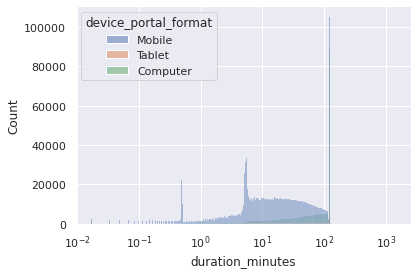

In [33]:
sns.histplot(df_plot[df_plot.duration>0], x='duration_minutes', 
            hue='device_portal_format', log_scale=True)

We see that the mobile are the most used in all range of duration and then it comes the computer. Also we can see that the mobile use duration is almost uniform while the computer is more used for the long duration.

Now, we will try to see the evolution of the use and the duration of each device with time. To do so, we will create an other column that contains the month and we will see the duration mean on each month and for each device. This ca help to have an idea about the future duration depending on th device type and so the consomation in general.

In [34]:
df_plot["datetime"] = pd.to_datetime(df_plot["datetime"])
df_plot.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1811947 entries, 0 to 2033800
Data columns (total 28 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   code_site                object        
 1   datetime                 datetime64[ns]
 2   endtime_or_dash          datetime64[ns]
 3   duration                 int64         
 4   duration_minutes         float64       
 5   incomingzonelabel        object        
 6   incomingnetworklabel     object        
 7   device_portal_format     object        
 8   device_constructor_name  object        
 9   bytesin                  int64         
 10  datain_gb                float64       
 11  bytesout                 int64         
 12  dataout_gb               float64       
 13  packetsin                int64         
 14  packetsout               int64         
 15  userlanguage             object        
 16  geo_shape                object        
 17  name_site                ob

In [35]:
import datetime as dt
df_plot['Month'] = df_plot['datetime'].dt.month 

In [36]:
df_plot['year'] = df_plot["datetime"].dt.year

In [37]:
df_plot.head(3)

,code_site,datetime,endtime_or_dash,duration,duration_minutes,incomingzonelabel,incomingnetworklabel,device_portal_format,device_constructor_name,bytesin,...,number_hotspots,etat2,latitude,longitude,browser_name,browser_version,os_name,os_version,Month,year
0,PW0191,2019-09-01 13:30:00,2019-09-01 13:34:00,209,3.483333,JARD GARCIA LORCA-SQ HDV,75004,Mobile,Apple,6504101,...,1,Opérationnel,48.854711,2.353241,Safari,0,iOS,12.3.1,9,2019
1,PW0122-1,2019-09-01 13:27:00,2019-09-01 13:43:00,963,16.050000,HDV RDC,75004,Mobile,HUAWEI,66268190,...,4,Opérationnel,48.856390,2.352388,Chrome,50.0,Android,5.1,9,2019
2,PW0110,2019-09-01 13:30:00,2019-09-01 13:53:00,1402,23.366667,JARD NELSON MANDELA,75001,Mobile,other,21974388,...,2,Opérationnel,48.861469,2.346304,Chrome,76.0,Android,7.0,9,2019


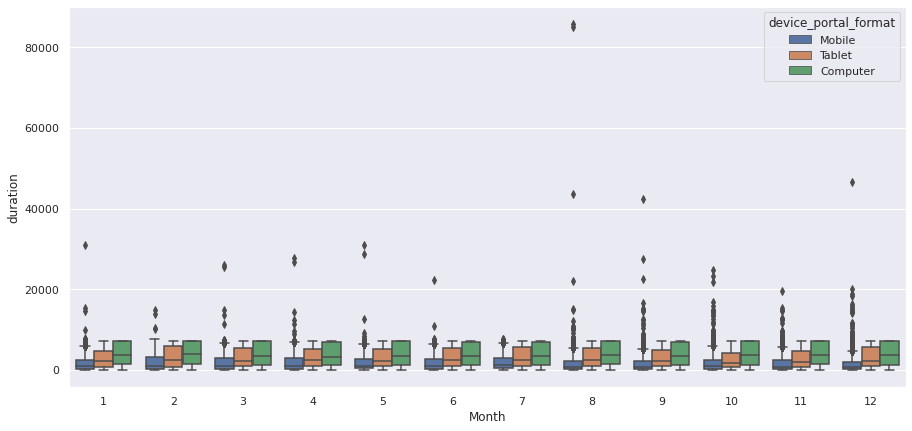

In [38]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Month", y="duration", hue="device_portal_format", data=df_plot)

We see that the use duration distribution for all devices doesn't change a lot and this is because of the scale. To make more readeable we will use the log dueration column again, but this will change a bit the distribution but it lets the distribution more logical.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


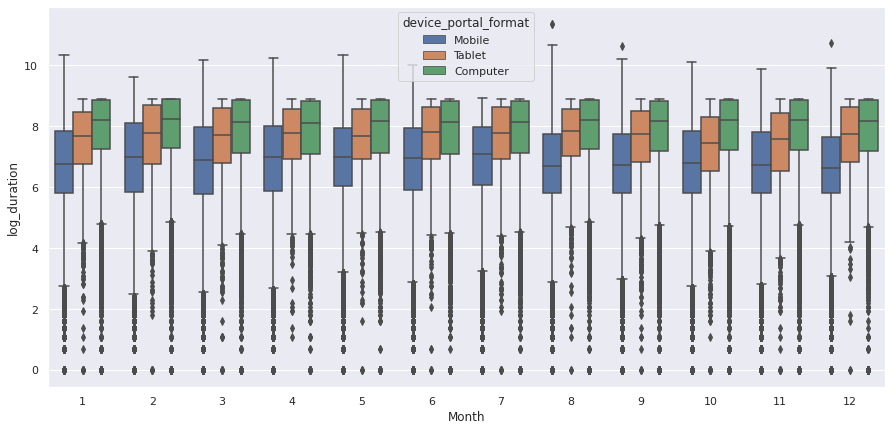

In [39]:
df_plot["log_duration"] = np.log(df_plot["duration"])
plt.figure(figsize=(15,7))
sns.boxplot(x="Month", y="log_duration", hue="device_portal_format", data=df_plot)

We see that the duration distribution for the computer doesn't change a lot between the months, but instead the duration distribution for the mobile device duration use is less stable and we can see it from the first boxplot since the mobile is the device that contains the outliers the most. Even with this we don't know which of the devices use more the data from the sources .

In [40]:
df_plot["date"] = df_plot["datetime"].dt.strftime("%Y-%m")

In [41]:
series_data = df_plot.groupby(["device_portal_format","year","Month","date"])["duration"].mean()

In [42]:
data = pd.DataFrame(series_data).sort_values(by=['year','Month'])
data.reset_index(inplace=True)
data.head()

,device_portal_format,year,Month,date,duration
0,Computer,2019,8,2019-08,51.000000
1,Mobile,2019,8,2019-08,1562.294118
2,Computer,2019,9,2019-09,3864.944846
3,Mobile,2019,9,2019-09,1685.715057
4,Tablet,2019,9,2019-09,2587.401901


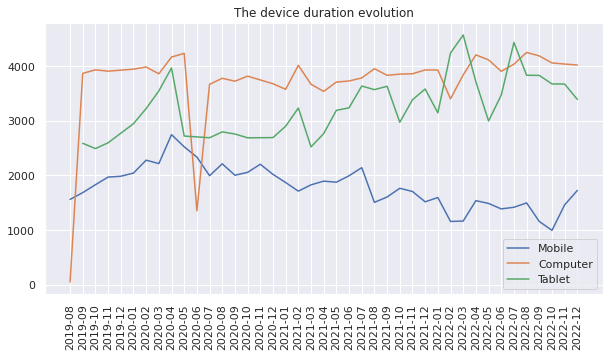

In [43]:
plt.figure(figsize=(10,5))
plt.plot(data[data['device_portal_format']=='Mobile']["date"], 
         data[data['device_portal_format']=='Mobile']["duration"], label="Mobile")

plt.plot(data[data['device_portal_format']=='Computer']["date"], 
         data[data['device_portal_format']=='Computer']["duration"], label="Computer")

plt.plot(data[data['device_portal_format']=='Tablet']["date"], 
         data[data['device_portal_format']=='Tablet']["duration"], label="Tablet")

plt.xticks(rotation='vertical')
plt.title("The device duration evolution")
plt.legend()
plt.show()

The average duration use evolution for each of the devices gives more information about future evolution. We see that the tablets use more service at the end than than in the begining of the period in the dataset. Instead, the mobile duration evolution is getting down and the computer average duration is more stable in all the period.

To have more insights about the use of the service and its relation with the devices used, we will use the volume of data uploaded or downloaded.

In [44]:
df_plot[['dataout_gb','datain_gb']].describe()

,dataout_gb,datain_gb
count,1.811947e+06,1.811947e+06
mean,9.286673e+00,5.913681e+01
std,3.473352e+01,1.101547e+02
min,0.000000e+00,0.000000e+00
25%,5.292382e-01,3.381966e+00
50%,2.405804e+00,1.718325e+01
75%,8.084816e+00,6.265745e+01
max,3.599585e+03,4.975991e+03


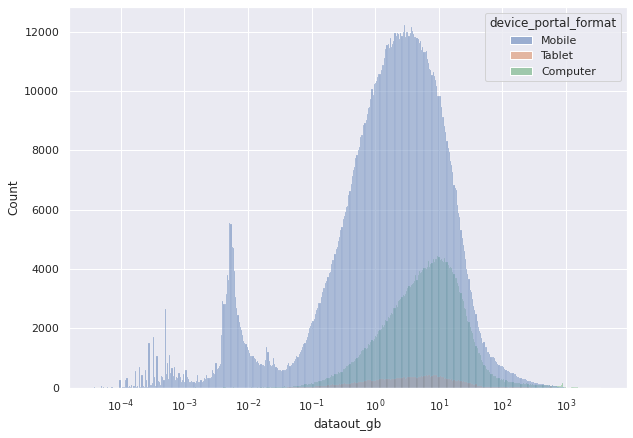

In [45]:
plt.figure(figsize=(10,7))
sns.histplot(df_plot[df_plot["dataout_gb"]>0], x='dataout_gb', 
            hue='device_portal_format', log_scale=True)

In [46]:
df_plot["log_dataout_gb"] = np.log(df_plot[df_plot['dataout_gb']>0]['dataout_gb'])

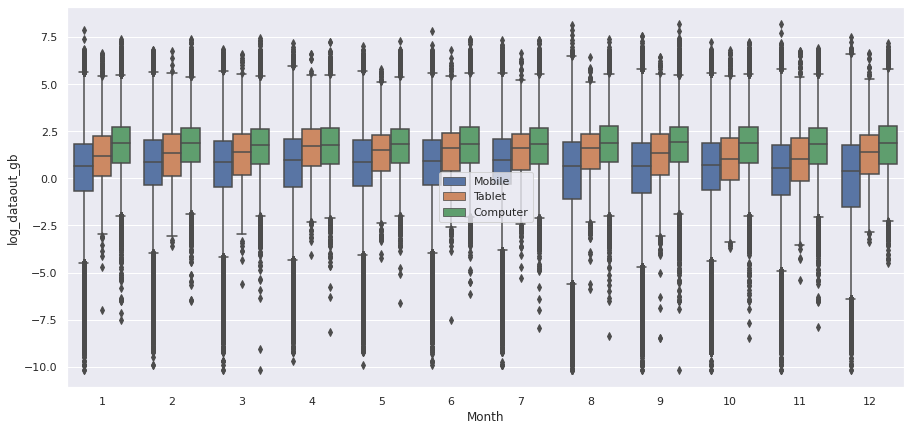

In [47]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Month", y="log_dataout_gb", hue="device_portal_format", data=df_plot)
plt.legend(loc="best")

From these plots we see that the computer devices download the most data than the tablet which uses itself more data than the mobile. This is the same thing that the duration. Also, we remark that there is no trend or saisonality in this data. But this is may have an other interpretation that use the data usage and the duration.

One thing that we can think to do is to see the average use of the data for each device by using the columns data and duration.

In [48]:
df_plot["data/duration"] = df_plot["dataout_gb"]/df_plot["duration_minutes"]*1000
df_plot["data/duration"][:5]

0    160.242199
1    152.952664
2     97.572841
3    112.452253
4     48.915216
Name: data/duration, dtype: float64

Text(0.5, 1.0, 'The device duration evolution')

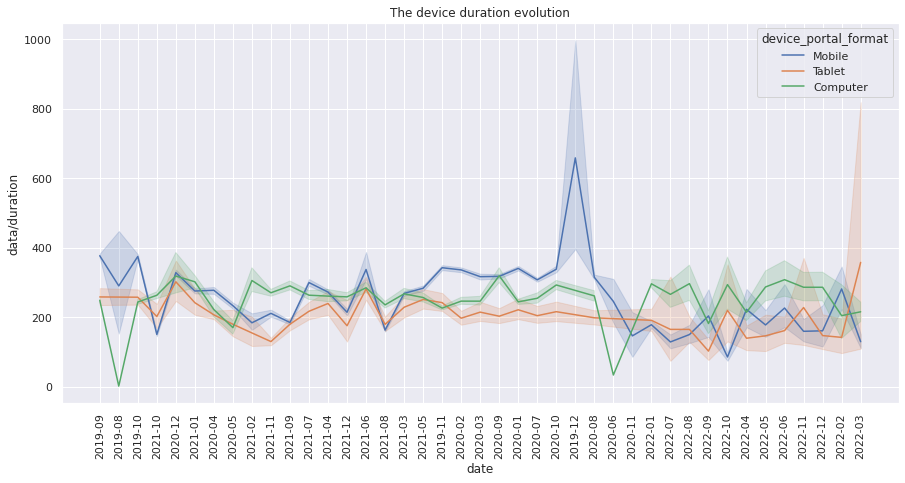

In [49]:
plt.figure(figsize=(15,7))
sns.lineplot(x="date", y="data/duration", hue="device_portal_format",data=df_plot)
plt.xticks(rotation='vertical')
plt.title("The device duration evolution")

This plot gives the evolution of the data use for each device per minute, and at the same time gives its variation for each month.As it was expected what we have saw at the begining and treating each variable independently to the other ones doesn't gives the insights needed to come up with a conclusion about the relation between the deviice and the data use, so it depend also on the relation between them. Here the fraction between the data use and the duration seems to be the same for computers and mobile with more variation for the mobiles.

To end this part, we will do a map where we plot an animation of the evoltion of the duration on the map for each device. We can easily adapt this map to plot a lot of measures on the map. Also, because of the number of observation we choosed to use just a little number of observation to do this just to have an idea on the evoltuion of the duartion use in each place in France for each device type

In [51]:
# We can change the parameters of the plot to animate each variable of interest  
fig=px.scatter_geo(df_plot.iloc[-1000:,:], lat = 'latitude', lon="longitude", size="duration",
                   animation_frame="date", color="device_portal_format",
                scope='europe',title="A sophisticated way to see the world evolution in Europe",
                locationmode='geojson-id')
fig.show()

# Prepare data for prediction

### Select columns 

The first step is to select the columns with which we are going to do our training.

In [52]:
columns_kept = ['datetime', 'duration', 'zipcode',
                'device_portal_format', 'device_constructor_name',
                'latitude', 'longitude', 'datain_gb', 'dataout_gb',
                'browser_name', 'browser_version', 'os_name', 'os_version']
df = df[columns_kept]

#CHANGE TYPE FOR DATE AND ZIPCODE
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%dT%H:%M:%S')
df['zipcode'] = df['zipcode'].astype('int').astype("category")

df.dtypes

datetime                   datetime64[ns]
duration                            int64
zipcode                          category
device_portal_format               object
device_constructor_name            object
latitude                          float64
longitude                         float64
datain_gb                         float64
dataout_gb                        float64
browser_name                       object
browser_version                    object
os_name                            object
os_version                         object
dtype: object

In [53]:
# COMBINE DATA IN AND DATA OUT 
df['data'] = df['datain_gb'] + df['dataout_gb']
df.drop(['datain_gb', 'dataout_gb'], axis = 1, inplace = True)

Now we are going to simplify versions, supposing that version X.YY is equivalent to X.WW which is equivalent to version X. <br>
Then we will order versions by their date of release and change them by successive integers. This means if we have a list like [3.0, 4.0, 4.1, 7] it will end as [1, 2, 2, 3] as we have three major different versions.

In [54]:
# SIMPLIFY VERSION
df['os_version'] = df['os_version'].apply(lambda x : x.split('.')[0])
df['browser_version'] = df['browser_version'].apply(lambda x : x.split('.')[0])

In [55]:
df.groupby('os_name').agg({'os_version': lambda x : x.unique()})

,os_version
os_name,
Android,"[5, 7, 8, 4, 6, 9, 2, 10]"
Linux,0
Mac OS X,"[10, 11, 0, 12]"
PlayStation Vita,3
Windows,"[10, 8, 7]"
Windows Phone,"[8, 10]"
Windows Vista,0
Windows XP,0
iOS,"[12, 11, 9, 10, 8, 7, 13, 15, 14, 6, 4, 5, 3]"


In [56]:
# REPLACE VERSION BY ORDERED INTEGER FOR OS 
versions_per_os = df.groupby('os_name').agg({'os_version': lambda x : x.unique()})
for os in versions_per_os.index:
  try:
    versions = versions_per_os.loc[os,'os_version'].tolist()
    versions.sort(key=int)
    versions_replace = dict(zip(versions, range(1, len(versions)+1)))

  except: # If there is only one version for this os
    version = versions_per_os.loc[os,'os_version']
    versions_replace ={version : max(1, int(version))}
  df.loc[df['os_name'] == os, 'os_version'] = df.loc[df['os_name'] == os, 'os_version'].replace(versions_replace)


# FOR BROWSER
versions_per_browser = df.groupby('browser_name').agg({'browser_version': lambda x : x.unique()})
for browser in versions_per_browser.index:
  try:
    versions = versions_per_browser.loc[browser, 'browser_version'].tolist()
    versions.sort(key=int)
    versions_replace = dict(zip(versions, range(1, len(versions)+1)))

  except: # If there is only one version for this os
    version = versions_per_browser.loc[browser, 'browser_version']
    versions_replace ={version : max(1, int(version))}

  df.loc[df['browser_name'] == browser, 'browser_version'] = df.loc[df['browser_name'] == browser, 'browser_version'].replace(versions_replace)

In [57]:
#CHANGE TYPE TO INT
df['os_version'] = df['os_version'].astype('uint16')
df['browser_version'] = df['browser_version'].astype('uint16')

Now let's encode string variable. To do so we can use One Hot or numerical encoding. One hot encoding is better as it is not imply superiority between variable but can become complicate if we have to many possible values for a variable. So we compute the number of unique value for each variable.

In [58]:
print(f"Number of unique device constructor : {len(df['device_constructor_name'].unique())}")
print(f"Number of unique device portal : {len(df['device_portal_format'].unique())}")
print(f"Number of unique browser : {len(df['browser_name'].unique())}")
print(f"Number of unique os : {len(df['os_name'].unique())}")

Number of unique device constructor : 11
Number of unique device portal : 3
Number of unique browser : 9
Number of unique os : 10


This results in 33 new columns. We decide to proceed with it. For os and browser version, we multiply the one hot encoding value by the version integer encoding. Like this we have a relation of superiority within the version of the same browser / os, but not between two different browser / os.



In [59]:
ohe_browser = pd.get_dummies(df['browser_name'], prefix='browser')
browser_values = ohe_browser.values * df['browser_version'].values.reshape(-1, 1)
ohe_browser.iloc[:,:] =  browser_values

df = df.merge(ohe_browser, left_index=True, right_index=True)

In [60]:
ohe_os = pd.get_dummies(df['os_name'], prefix='os')
os_values = ohe_os.values * df['os_version'].values.reshape(-1, 1)
ohe_os.iloc[:,:] =  os_values

df = df.merge(ohe_os, left_index=True, right_index=True)

In [61]:
df = df.merge(pd.get_dummies(df['device_portal_format'], prefix=None), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df['device_constructor_name'], prefix='device_constructor'), left_index=True, right_index=True)

In [62]:
df.drop(['browser_name', 'os_name', 'device_portal_format', 
         'device_constructor_name', 'os_version', 'browser_version'],
        axis=1, inplace=True)

### Group by zipcode and define a frequence

We decided to deal with the data about all the hotspots of a zipcode, available on one week. Note that for the challenge purpose, it is possible to aggregate one couple of days instead of a week, even to predict the data transfer weekly.<br>
For the aggregate operation, we will apply a mean for column where one hot encoding has been multiplied by the version, and a sum for column where the maximum value for a row is one. <br>

Let's also see if there is the same number of week for all zipcode.

In [63]:
#BUILD LISTs FOR MERGE BOTH OPERATION SUM AND MEAN
sum_cols = set()
mean_cols = set()

for col in df.columns:
    if (col in ['Mobile', 'Tablet', 'Computer']) or ('device_constructor' in col):
        sum_cols.add(col)
    else:
        mean_cols.add(col)

mean_cols.remove('datetime')
mean_cols.remove('zipcode')

In [64]:
df_sum = df[['zipcode','datetime']+list(sum_cols)].groupby('zipcode').resample('W-MON', on='datetime').sum()
df_mean = df[['zipcode','datetime']+list(mean_cols)].groupby('zipcode').resample('W-MON', on='datetime').mean()

In [65]:
dataframe_zip_freq = df_mean.merge(df_sum, left_index=True, right_index=True)
dataframe_zip_freq.groupby(level="zipcode").size()

zipcode
75001    171
75002    171
75003    171
75004    171
75005    171
75006    171
75007    171
75008    171
75009    171
75010    171
75011    171
75012    171
75013    171
75014    171
75015    171
75016    171
75017    171
75018    171
75019    171
75020    171
92100    142
dtype: int64

We can see we have the same number of weeks for all paris district (zipcode starting with '75...'. To simplify the challenge, we will the zipcode '92100'.
However, we had to check if we have data for all weeks, meaning does we have NaN values.

In [66]:
dataframe_zip_freq.dropna().groupby(level="zipcode").size()

zipcode
75001    123
75002    122
75003    122
75004    122
75005    122
75006    120
75007    122
75008    122
75009    122
75010    122
75011    122
75012    123
75013    123
75014    122
75015    122
75016    121
75017    122
75018    123
75019    123
75020    122
92100     87
dtype: int64

To fix it, we will only keep the 120 last weeks value for each zipcode.

In [67]:
# WE DROP NAN ROWS AND RESET INDEX TO GROUP BY ZIPCODE
# THEN WE APPLY A FUNCTION TO RETRIEVE THE LAST 120 WEEKS

temp_df = dataframe_zip_freq.dropna().reset_index().groupby("zipcode")\
        .apply(lambda x : x.sort_values('datetime').iloc[x.shape[0] - 120:, :])\
        .reset_index(drop=True)

# REMOVE '92100' ZIPCODE
final_df = temp_df[temp_df['zipcode'] != 92100]

Now, the last step we have to deal with is to add an additional feature which will be the number of days separating the two datetime. This is needed as some weeks that do not contains value have been removed. The model might need this information an we can explain it through the number of days separating the two date. <br>
So for each row a variable corresponding to the number of days between this row date and the following will be compute, as we want to compute the data transfer amount of the following week available.

In [68]:
#GROUP BY ZIPCODE
#COMPUTE DIFFERENCE BETWEEN TWO ROWS
#RESET INDEX
#AND GET DATETIME

day_serie = final_df.groupby('zipcode')\
          .apply(lambda x : x['datetime'].diff().shift(-1).dt.days)\
          .reset_index()\
          ['datetime']

day_serie

0        7.0
1        7.0
2        7.0
3        7.0
4        7.0
        ... 
2395    35.0
2396    28.0
2397    35.0
2398    28.0
2399     NaN
Name: datetime, Length: 2400, dtype: float64

In [69]:
final_df = final_df.merge(day_serie.rename('days_interval'), left_index=True, right_index=True)

In [70]:
final_df.head(3)

,zipcode,datetime,browser_Safari,browser_IEMobile,browser_MSIE,os_Android,os_PlayStation Vita,latitude,os_iOS,longitude,...,device_constructor_LG,device_constructor_Sony,Mobile,device_constructor_other,device_constructor_Samsung,device_constructor_Nokia,Computer,device_constructor_HTC,device_constructor_RIM,days_interval
0,75001,2019-09-23,0.482903,0.0,0.025456,1.137918,0.0,48.860545,4.370441,2.344004,...,17.0,1.0,2204.0,1031.0,240.0,8.0,358.0,0.0,0.0,7.0
1,75001,2019-09-30,0.433521,0.0,0.014102,1.269944,0.0,48.860812,3.856164,2.344679,...,14.0,0.0,2008.0,1050.0,254.0,13.0,407.0,0.0,1.0,7.0
2,75001,2019-10-07,0.489720,0.0,0.001645,1.174753,0.0,48.860894,3.979852,2.344461,...,8.0,0.0,1927.0,996.0,216.0,17.0,434.0,0.0,0.0,7.0


As we finally have our final dataset, we will now have our features X and our label y. <br>
X will be shape (2380, 37) as it will not contains the last week for each zipcode, which is week with Nan value as day_interval. <br>
y will be shape (2380, ) as it will not contains the first week data transfer amount for each zipcode.

In [71]:
y_serie = final_df['data'].index.map(lambda x: x % 120 != 0) * final_df['data']
y = y_serie[y_serie != 0].values

X = final_df.loc[:, ~final_df.columns.isin(['zipcode', 'datetime', 'data'])].dropna().values

In [72]:
print(f"Features shape : {X.shape}")
print(f"Label shape : {y.shape}")

Features shape : (2380, 37)
Label shape : (2380,)


## Define train data (public) and test data (private)

In [73]:
#SAVE X AND Y
with open('data.npy', 'wb') as f:
  np.save(f, X)
  np.save(f, y)

In [74]:
SPLIT_RATIO = 0.85
SEED = 42

# CONCATENATE TWO WEEKS t-2 and t-1 AS ONE ROW TO PREDICT AT t
X = X.reshape(-1, 37*2)
y = y[1::2]

rng = np.random.default_rng(SEED)

#GET TRAIN INDICES
train_idx = rng.choice(np.arange(X.shape[0]), size = int(X.shape[0]*SPLIT_RATIO), replace=False)

#GET TEST INDICES
mask = np.ones(X.shape[0], dtype=bool)
mask[train_idx] = False

X_train, y_train = X[train_idx, :], y[train_idx]
X_test, y_test = X[mask, :], y[mask]

In [75]:
print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print()
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (1011, 74)
y_train shape : (1011,)

X_test shape : (179, 74)
y_test shape : (179,)


In [76]:
#SAVE TRAIN
with open('train.npy', 'wb') as f:
  np.save(f, X_train)
  np.save(f, y_train)

#SAVE TEST
with open('test.npy', 'wb') as f:
  np.save(f, X_test)
  np.save(f, y_test)


# A first simple baseline 

To begin lets' try tro apply the simplest model we could think of : a sweet linear regression.

In [77]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
R2 = model.score(X_test, y_test)

print(f"R^2 = {R2:.5f}")

R^2 = 0.29521


Maybe one could improve this $R^2$, by adding some regularizers with wisely chosen hyper-parameters, which one could find using some cross-validation.  
Let's check how an Elastic-Net performs here.

In [78]:
from sklearn.linear_model import ElasticNetCV

seed = 42
regr =  ElasticNetCV(cv=10, max_iter=5000, random_state=seed)
regr.fit(X_train, y_train)
R2 = regr.score(X_test, y_test)

print(f"R^2 = {R2:.5f}")

R^2 = 0.33642


That's a little bit better, however let us try one final model i.e. SVR to see if one could improve a little the to-beat $R^2$ score.  
One could, once again, find good values for the free parameters $C$ and $ϵ$ using one simple Grid Search.

In [79]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'C':[10, 100, 500, 1000], 'epsilon':[0.1, 0.5, 1, 2]}

svr = svm.SVR(kernel = "poly", degree=3)
grid = GridSearchCV(svr, parameters)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVR(kernel='poly'),
             param_grid={'C': [10, 100, 500, 1000],
                         'epsilon': [0.1, 0.5, 1, 2]})

We can now retrieve the grid search results and consequently choose the parameters which perform best on test set.

In [80]:
res = grid.cv_results_
print(f"The best test scores have been reached using following parameters : {res['params'][res['rank_test_score'][0]]}")

The best test scores have been reached using following parameters : {'C': 500, 'epsilon': 0.5}


Finally, our score gets a bit higher using this final model, it's now your turn to try to beat this score, to find the best model you can think of !

In [81]:
regr = svm.SVR(kernel='poly', degree=3, C=500, coef0=0, epsilon=0.5)
regr.fit(X_train, y_train)

R2 = regr.score(X_test, y_test)
print(f"R^2 = {R2:.5f}")

R^2 = 0.37207


In [82]:
!pip freeze > requirements.txt